## Perfroming Exrtact Load and Transform using MySQL, Panda and PySpark

So what I am doing is I have my data in MySQL on my google cloud, after that with my cluster I access my Python notebook, and then I create my Spark Session where I will Transform the Data and then make visuals and store the data in my bucket.  

## So Extraction is done on MYSQL TRANSFORM is done using Pandas and PySPARK and VISUALS is done using Matplotlib and seaborn 

In [9]:
import mysql.connector
from tabulate import tabulate

In [2]:
host = '10.106.48.3'
user = 'root'
password = 'Joelmen7890'
port = '3306'
database = 'loans'

TEST CONNECTION 

In [4]:
try:
    # Establish a connection to the MySQL server
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        port=port,
        database=database
    )

    print("Connected to MySQL server")

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    # Close the database connection
    if 'connection' in locals():
        connection.close()
        print("Connection closed")


Connected to MySQL server
Connection closed


In [12]:
try:
    # Establish a connection to the MySQL server
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        port=port,
        database=database
    )

    # Create a cursor object
    cursor = connection.cursor()

    # Execute the SELECT query
    cursor.execute("SELECT * FROM loan_data")

    # Fetch all the rows from the result set
    rows = cursor.fetchall()

    # Get column names
    columns = [desc[0] for desc in cursor.description]

    # Display the rows using tabulate
    print(tabulate(rows, headers=columns))

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    # Close the cursor and connection
    if 'connection' in locals():
        cursor.close()
        connection.close()
        print("Cursor and connection closed")


  credit_policy  purpose               int_rate    installment    log_annual_inc    dti    fico    days_with_cr_line    revol_bal    revol_util    inq_last_6mths    delinq_2yrs    pub_rec    not_fully_paid
---------------  ------------------  ----------  -------------  ----------------  -----  ------  -------------------  -----------  ------------  ----------------  -------------  ---------  ----------------
              1  debt_consolidation      0.1189         829.1           11.3504   19.48     737              5639.96        28854          52.1                 0              0          0                 0
              1  credit_card             0.1071         228.22          11.0821   14.29     707              2760           33623          76.7                 0              0          0                 0
              1  debt_consolidation      0.1357         366.86          10.3735   11.63     682              4710            3511          25.6                 1              0

In [13]:
import pandas as pd 

In [14]:
try:
    # Establish a connection to the MySQL server
    connection = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        port=port,
        database=database
    )

    # Execute the SELECT query and store result in a DataFrame
    df = pd.read_sql("SELECT * FROM loan_data", con=connection)

    # Display the DataFrame
    print(df)

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    if 'connection' in locals():
        connection.close()
        print("Connection closed")


    credit_policy             purpose  int_rate  installment  log_annual_inc  \
0               1  debt_consolidation    0.1189       829.10       11.350407   
1               1         credit_card    0.1071       228.22       11.082143   
2               1  debt_consolidation    0.1357       366.86       10.373491   
3               1  debt_consolidation    0.1008       162.34       11.350407   
4               1         credit_card    0.1426       102.92       11.299732   
5               1         credit_card    0.0788       125.13       11.904968   
6               1  debt_consolidation    0.1496       194.02       10.714418   
7               1           all_other    0.1114       131.22       11.002100   
8               1    home_improvement    0.1134        87.19       11.407565   
9               1  debt_consolidation    0.1221        84.12       10.203592   
10              1  debt_consolidation    0.1347       360.43       10.434116   
11              1  debt_consolidation   

/tmp/ipykernel_27377/1246147068.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM loan_data", con=connection)


In [15]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Starting a Pyspark session

In [16]:
from pyspark.sql import SparkSession


In [17]:
spark = SparkSession.builder \
    .appName("Upload DataFrame to PySpark") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/30 17:39:08 INFO SparkEnv: Registering MapOutputTracker
24/03/30 17:39:08 INFO SparkEnv: Registering BlockManagerMaster
24/03/30 17:39:08 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/03/30 17:39:08 INFO SparkEnv: Registering OutputCommitCoordinator


In [18]:
spark_df = spark.createDataFrame(df)

In [19]:
spark_df.show(10)

+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|credit_policy|           purpose|int_rate|installment|log_annual_inc|  dti|fico|days_with_cr_line|revol_bal|revol_util|inq_last_6mths|delinq_2yrs|pub_rec|not_fully_paid|
+-------------+------------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|            1|debt_consolidation|  0.1189|      829.1|   11.35040654|19.48| 737|      5639.958333|    28854|      52.1|             0|          0|      0|             0|
|            1|       credit_card|  0.1071|     228.22|   11.08214255|14.29| 707|           2760.0|    33623|      76.7|             0|          0|      0|             0|
|            1|debt_consolidation|  0.1357|     366.86|   10.37349118|11.63| 682|           4710.0|     3511|      25.6|             1|          

In [22]:
from pyspark.sql.functions import col
spark_df.select("purpose").distinct().show()

+------------------+
|           purpose|
+------------------+
|         all_other|
|debt_consolidation|
|       credit_card|
|  home_improvement|
|    small_business|
|    major_purchase|
+------------------+



Perfroming Transformation 

In [23]:
selected_purposes = spark_df.filter(
    (col("purpose") == "credit_card") |
    (col("purpose") == "home_improvement") |
    (col("purpose") == "major_purchase")
)

In [24]:
selected_purposes.show()

+-------------+----------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|credit_policy|         purpose|int_rate|installment|log_annual_inc|  dti|fico|days_with_cr_line|revol_bal|revol_util|inq_last_6mths|delinq_2yrs|pub_rec|not_fully_paid|
+-------------+----------------+--------+-----------+--------------+-----+----+-----------------+---------+----------+--------------+-----------+-------+--------------+
|            1|     credit_card|  0.1071|     228.22|   11.08214255|14.29| 707|           2760.0|    33623|      76.7|             0|          0|      0|             0|
|            1|     credit_card|  0.1426|     102.92|   11.29973224|14.97| 667|           4066.0|     4740|      39.5|             0|          1|      0|             0|
|            1|     credit_card|  0.0788|     125.13|   11.90496755|16.98| 727|      6120.041667|    50807|      51.0|             0|          0|      0|  

VISUALS 

In [25]:
import matplotlib.pyplot as plt


In [26]:
# Group the data by purpose and count the occurrences
purpose_counts = spark_df.groupBy("purpose").count().collect()

# Extract purposes and counts
purposes = [row["purpose"] for row in purpose_counts]
counts = [row["count"] for row in purpose_counts]

Barplot

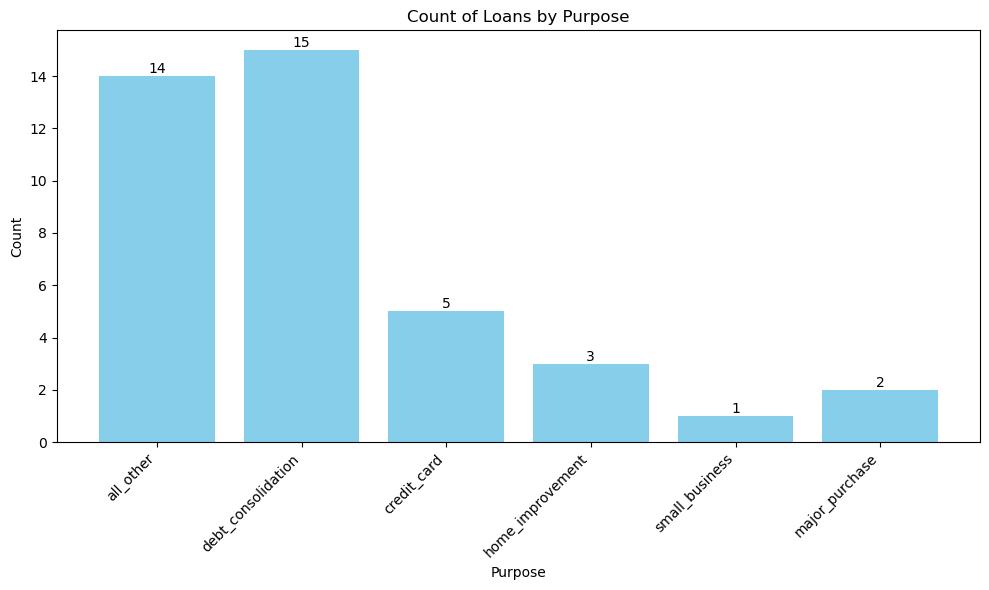

In [30]:
plt.figure(figsize=(10, 6))
bars = plt.bar(purposes, counts, color='skyblue')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Count of Loans by Purpose')
plt.xticks(rotation=45, ha='right')

# Add text labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()


Scatterplot


In [33]:
selected_purposes_pd = selected_purposes.toPandas()
# Extracting data
int_rate = selected_purposes_pd['int_rate']
installment = selected_purposes_pd['installment']

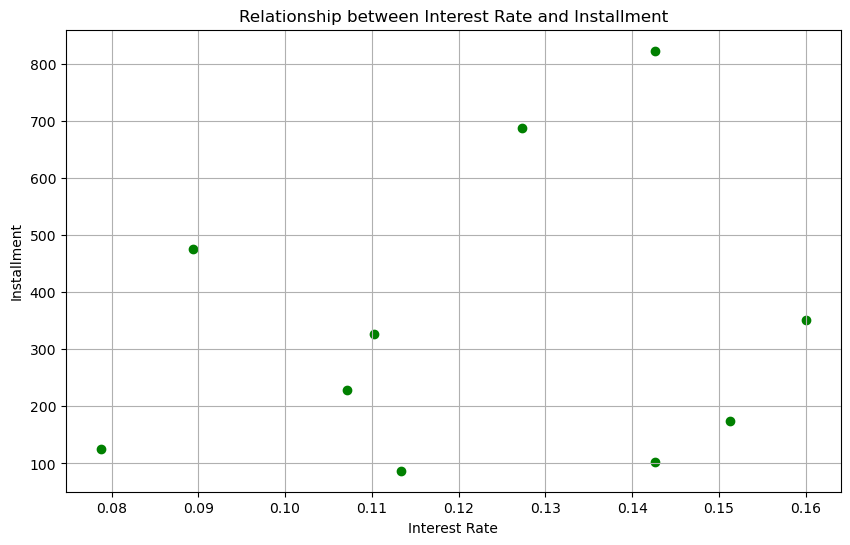

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(int_rate, installment, color='green')
plt.xlabel('Interest Rate')
plt.ylabel('Installment')
plt.title('Relationship between Interest Rate and Installment')
plt.grid(True)
plt.show()

Plot using Seaborn Library

In [35]:
import seaborn as sns

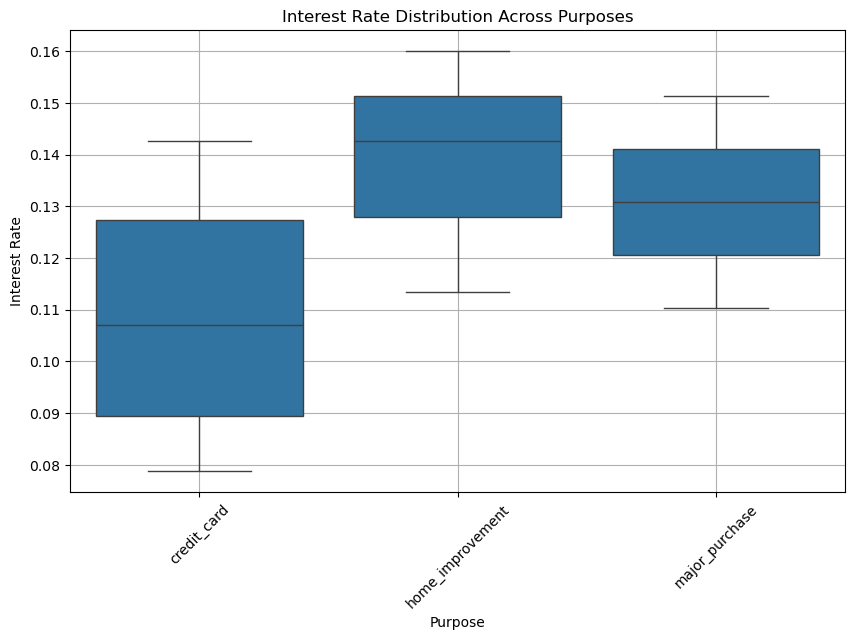

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_purposes_pd, x='purpose', y='int_rate')
plt.xlabel('Purpose')
plt.ylabel('Interest Rate')
plt.title('Interest Rate Distribution Across Purposes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

Saving the Data in my bucket for future extraction 

In [39]:
# Define the output path in your Google Cloud Storage bucket
output_path = "gs://pysparkbucket-jm/transformed_data"

In [40]:
# Save the DataFrame as a CSV file in your bucket
selected_purposes.write.csv(output_path, header=True, mode="overwrite")

Do not forget to stop you spark session 

In [41]:

spark.stop()

